### This script contains the following:
#### 1. Import data and libraries
#### 2. Data wrangling
#### 3. Data cleaning
#### 4. Plotting a choropleth

#### 1. Import data and libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import data
df = pd.read_csv(r'C:\Users\eog87\Desktop\Data Analytics\2. Data Immersion\6. Advanced Analytics N Dashboard Design\3. Geographical Visualizations with Python/gun_violence_ex2.csv', index_col = False)

In [17]:
df.head()

,Unnamed: 0,incident_id,date,day_of_week,day,month,year,address,city_or_county,state,...,n_suspect,location_description,latitude,longitude,state_house_district,state_senate_district,congressional_district,kills_flag,injured_flag,guns_flag
0,0,461105,2013-01-01,Tuesday,1,1,2013,1506 Versailles Avenue and Coursin Street,Mckeesport,Pennsylvania,...,1,Unknown,40.3467,-79.8559,NaN,NaN,14.0,single kill,low injured,NaN
1,1,460726,2013-01-01,Tuesday,1,1,2013,13500 block of Cerise Avenue,Hawthorne,California,...,1,Unknown,33.9090,-118.3330,62.0,35.0,43.0,single kill,low injured,NaN
2,2,478855,2013-01-01,Tuesday,1,1,2013,1776 East 28th Street,Lorain,Ohio,...,2,Cotton Club,41.4455,-82.1377,56.0,13.0,9.0,single kill,low injured,low guns
3,3,478925,2013-01-05,Saturday,5,1,2013,16000 block of East Ithaca Place,Aurora,Colorado,...,1,Unknown,39.6518,-104.8020,40.0,28.0,6.0,low kills,single injured,NaN
4,4,478959,2013-01-07,Monday,7,1,2013,307 Mourning Dove Terrace,Greensboro,North Carolina,...,1,Unknown,36.1140,-79.9569,62.0,27.0,6.0,low kills,low injured,low guns


In [19]:
df = df.drop(columns=['Unnamed: 0'])

In [20]:
pd.set_option('display.max_columns', None)

In [21]:
df.head()

,incident_id,date,day_of_week,day,month,year,address,city_or_county,state,n_participants,n_guns_involved,n_killed,n_injured,n_adult,n_teen,n_child,n_male,n_female,n_victim,n_suspect,location_description,latitude,longitude,state_house_district,state_senate_district,congressional_district,kills_flag,injured_flag,guns_flag
0,461105,2013-01-01,Tuesday,1,1,2013,1506 Versailles Avenue and Coursin Street,Mckeesport,Pennsylvania,5,NaN,0,4,5,0,0,3,1,4,1,Unknown,40.3467,-79.8559,NaN,NaN,14.0,single kill,low injured,NaN
1,460726,2013-01-01,Tuesday,1,1,2013,13500 block of Cerise Avenue,Hawthorne,California,4,NaN,1,3,4,0,0,1,0,4,1,Unknown,33.9090,-118.3330,62.0,35.0,43.0,single kill,low injured,NaN
2,478855,2013-01-01,Tuesday,1,1,2013,1776 East 28th Street,Lorain,Ohio,5,2.0,1,3,5,0,0,5,0,3,2,Cotton Club,41.4455,-82.1377,56.0,13.0,9.0,single kill,low injured,low guns
3,478925,2013-01-05,Saturday,5,1,2013,16000 block of East Ithaca Place,Aurora,Colorado,4,NaN,4,0,4,0,0,3,1,3,1,Unknown,39.6518,-104.8020,40.0,28.0,6.0,low kills,single injured,NaN
4,478959,2013-01-07,Monday,7,1,2013,307 Mourning Dove Terrace,Greensboro,North Carolina,4,2.0,2,2,3,1,0,2,2,3,1,Unknown,36.1140,-79.9569,62.0,27.0,6.0,low kills,low injured,low guns


In [22]:
# Import ".json" file for the U.S. 

world_geo = r'C:\Users\eog87\Desktop\Data Analytics\2. Data Immersion\6. Advanced Analytics N Dashboard Design\3. Geographical Visualizations with Python/us-states.json'

In [23]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r'C:\Users\eog87\Desktop\Data Analytics\2. Data Immersion\6. Advanced Analytics N Dashboard Design\3. Geographical Visualizations with Python/us-states.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

#### 2. Data wrangling

In [24]:
df.head()

,incident_id,date,day_of_week,day,month,year,address,city_or_county,state,n_participants,n_guns_involved,n_killed,n_injured,n_adult,n_teen,n_child,n_male,n_female,n_victim,n_suspect,location_description,latitude,longitude,state_house_district,state_senate_district,congressional_district,kills_flag,injured_flag,guns_flag
0,461105,2013-01-01,Tuesday,1,1,2013,1506 Versailles Avenue and Coursin Street,Mckeesport,Pennsylvania,5,NaN,0,4,5,0,0,3,1,4,1,Unknown,40.3467,-79.8559,NaN,NaN,14.0,single kill,low injured,NaN
1,460726,2013-01-01,Tuesday,1,1,2013,13500 block of Cerise Avenue,Hawthorne,California,4,NaN,1,3,4,0,0,1,0,4,1,Unknown,33.9090,-118.3330,62.0,35.0,43.0,single kill,low injured,NaN
2,478855,2013-01-01,Tuesday,1,1,2013,1776 East 28th Street,Lorain,Ohio,5,2.0,1,3,5,0,0,5,0,3,2,Cotton Club,41.4455,-82.1377,56.0,13.0,9.0,single kill,low injured,low guns
3,478925,2013-01-05,Saturday,5,1,2013,16000 block of East Ithaca Place,Aurora,Colorado,4,NaN,4,0,4,0,0,3,1,3,1,Unknown,39.6518,-104.8020,40.0,28.0,6.0,low kills,single injured,NaN
4,478959,2013-01-07,Monday,7,1,2013,307 Mourning Dove Terrace,Greensboro,North Carolina,4,2.0,2,2,3,1,0,2,2,3,1,Unknown,36.1140,-79.9569,62.0,27.0,6.0,low kills,low injured,low guns


In [25]:
total_incidents = df['state'].value_counts()

In [26]:
total_incidents

state
Illinois                17556
California              16306
Florida                 15029
Texas                   13577
Ohio                    10244
New York                 9712
Pennsylvania             8929
Georgia                  8925
North Carolina           8739
Louisiana                8103
Tennessee                7626
South Carolina           6939
Missouri                 6631
Michigan                 6136
Massachusetts            5981
Virginia                 5949
Indiana                  5852
Maryland                 5798
Alabama                  5471
New Jersey               5387
Wisconsin                4787
Kentucky                 4157
Mississippi              3599
Oklahoma                 3455
Washington               3434
Colorado                 3201
District of Columbia     3195
Connecticut              3067
Arkansas                 2842
Iowa                     2517
Minnesota                2408
Arizona                  2328
Oregon                   2286
Kans

#### 3. Data cleaning

In [27]:
# Check for missing values
total_incidents.isnull().sum()

0

In [28]:
# Check for duplicates
duplicates = total_incidents.duplicated()

In [29]:
duplicates.shape

(51,)

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


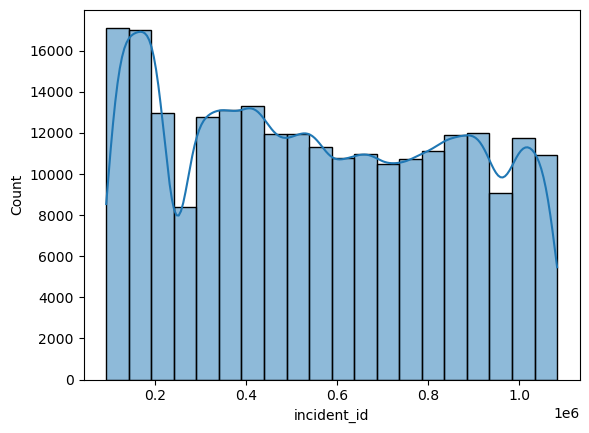

In [4]:
# Extreme values check
hist_incident = sns.histplot(df['incident_id'], bins = 20, kde = True)

In [5]:
path2 = r'C:\Users\eog87\Desktop\Data Analytics\2. Data Immersion\6. Advanced Analytics N Dashboard Design\7. Creating Data Dashboards\Github'
hist_incident.figure.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'hist_incident.png'))

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eog87\AppData\Local\Temp\ipykernel_14600\2266672708.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  hist_state.set_xticklabels(hist_state.get_xticklabels(), rotation=90)


[Text(0, 0, 'Pennsylvania'),
 Text(1, 0, 'California'),
 Text(2, 0, 'Ohio'),
 Text(3, 0, 'Colorado'),
 Text(4, 0, 'North Carolina'),
 Text(5, 0, 'Oklahoma'),
 Text(6, 0, 'New Mexico'),
 Text(7, 0, 'Louisiana'),
 Text(8, 0, 'Maryland'),
 Text(9, 0, 'Tennessee'),
 Text(10, 0, 'Missouri'),
 Text(11, 0, 'District of Columbia'),
 Text(12, 0, 'Illinois'),
 Text(13, 0, 'Delaware'),
 Text(14, 0, 'Utah'),
 Text(15, 0, 'Michigan'),
 Text(16, 0, 'Georgia'),
 Text(17, 0, 'Indiana'),
 Text(18, 0, 'Mississippi'),
 Text(19, 0, 'New York'),
 Text(20, 0, 'Florida'),
 Text(21, 0, 'Washington'),
 Text(22, 0, 'South Carolina'),
 Text(23, 0, 'Arizona'),
 Text(24, 0, 'Kentucky'),
 Text(25, 0, 'New Jersey'),
 Text(26, 0, 'Virginia'),
 Text(27, 0, 'Wisconsin'),
 Text(28, 0, 'Rhode Island'),
 Text(29, 0, 'Texas'),
 Text(30, 0, 'Alabama'),
 Text(31, 0, 'Kansas'),
 Text(32, 0, 'Connecticut'),
 Text(33, 0, 'West Virginia'),
 Text(34, 0, 'Minnesota'),
 Text(35, 0, 'Nevada'),
 Text(36, 0, 'Nebraska'),
 Text(37, 0, 

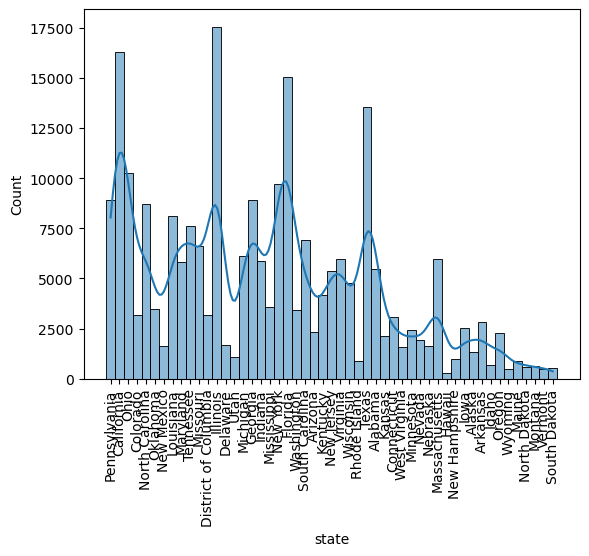

In [6]:
hist_state = sns.histplot(df['state'], kde = True)
hist_state.set_xticklabels(hist_state.get_xticklabels(), rotation=90)

In [7]:
hist_state.figure.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'hist_state.png'))

#### 4. Plotting a choropleth

In [37]:
total_incidents = total_incidents.reset_index()
total_incidents.columns = ['Country', 'Num_Incidents']

In [38]:
total_incidents

,Country,Num_Incidents
0,Illinois,17556
1,California,16306
2,Florida,15029
3,Texas,13577
4,Ohio,10244
5,New York,9712
6,Pennsylvania,8929
7,Georgia,8925
8,North Carolina,8739
9,Louisiana,8103


In [39]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [40, -95], zoom_start = 4)

folium.Choropleth(
    geo_data = world_geo, 
    data = total_incidents,
    columns = ['Country', 'Num_Incidents'],
    key_on = 'feature.properties.name',
    fill_color = 'BuPu', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Number of gun violence incidents by State").add_to(map)

folium.LayerControl().add_to(map)

map

In [40]:
map.save('gun_violence_incidents_cloropeth.html')

#### Does the analysis answer any of your existing research questions?
#### Does the analysis lead you to any new research questions?

###### Yes, one of the questions I asked was what is the state with more incidents, and now we know is Illinois